In [44]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot

In [12]:
iris = datasets.load_iris()
df=iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:

iris_df['target'] = iris.target
targets=iris.target_names
print(targets)

['setosa' 'versicolor' 'virginica']


In [ ]:
so there are 3 classes

In [21]:
df.shape

(150, 4)

# EDA

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [25]:
print(df.isnull().sum())
      

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [27]:
df.isna().apply(pd.value_counts)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
False,150,150,150,150


In [29]:
#unique values
df.nunique()


sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [30]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


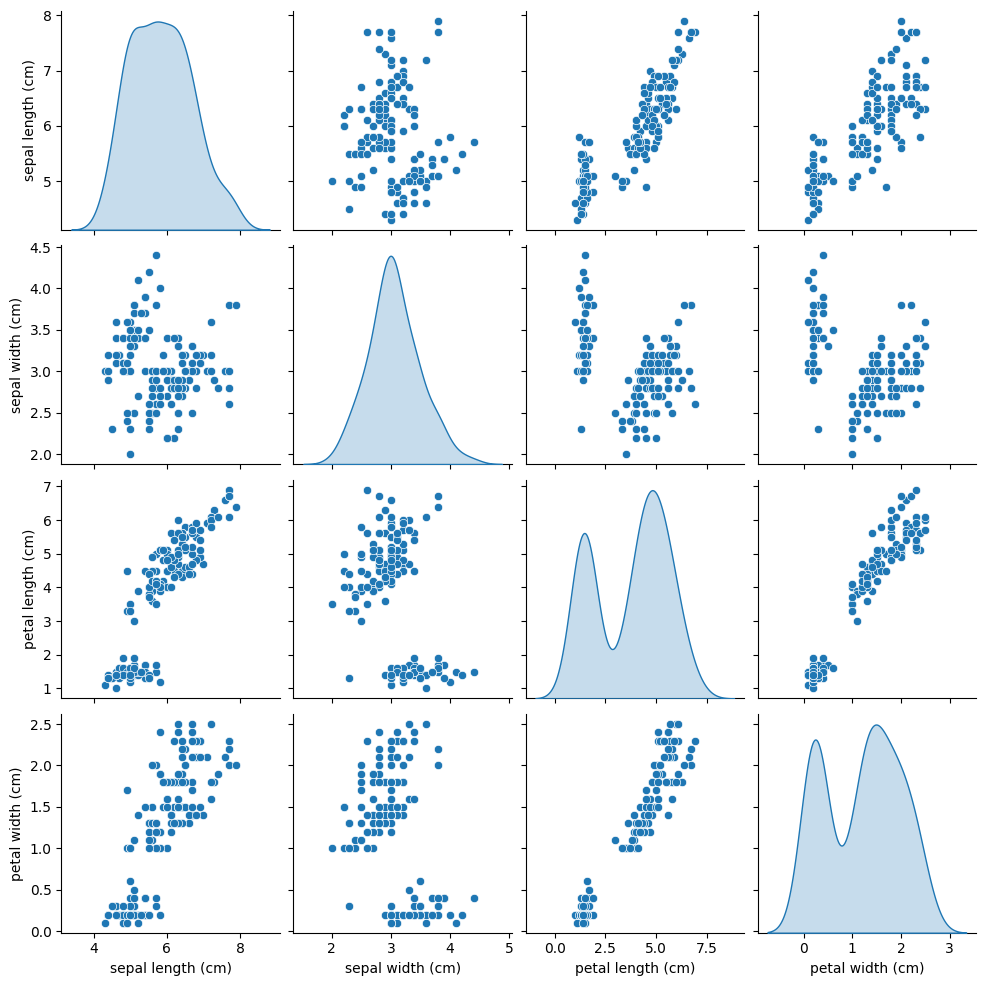

In [33]:
#pairplot

sns.pairplot(df,diag_kind ='kde')

<Axes: >

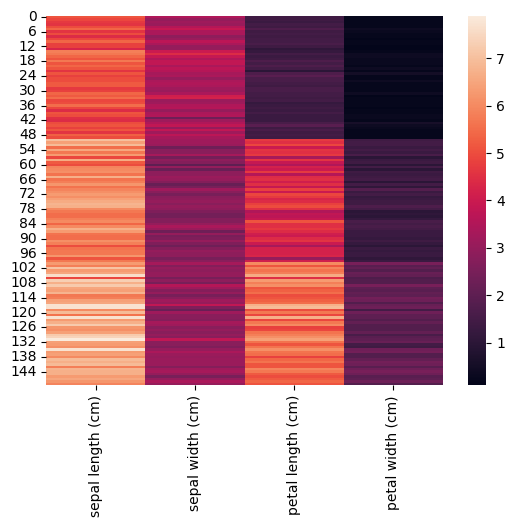

In [48]:

sns.heatmap(df)


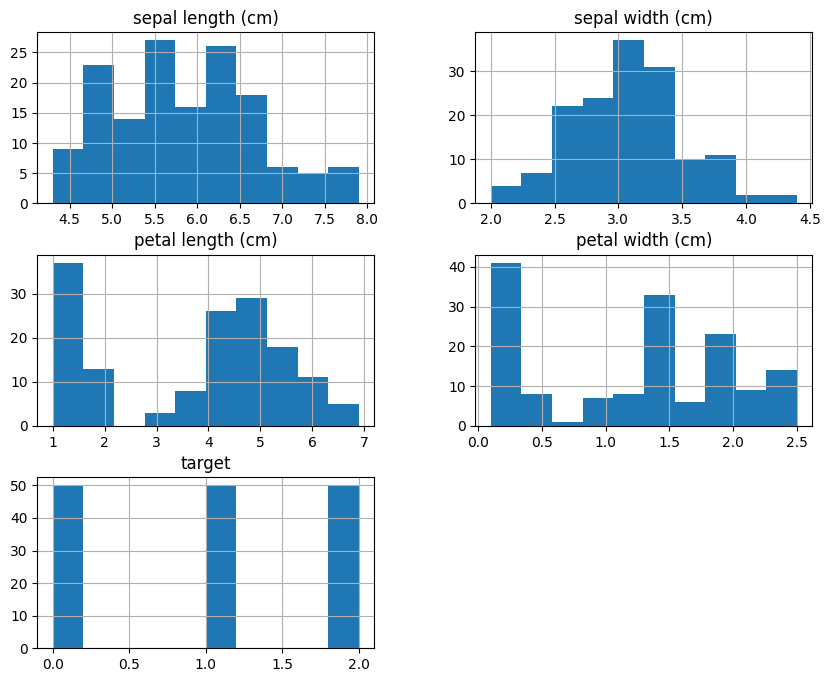

In [45]:
iris_df.hist(figsize=(10, 8))
plt.show()


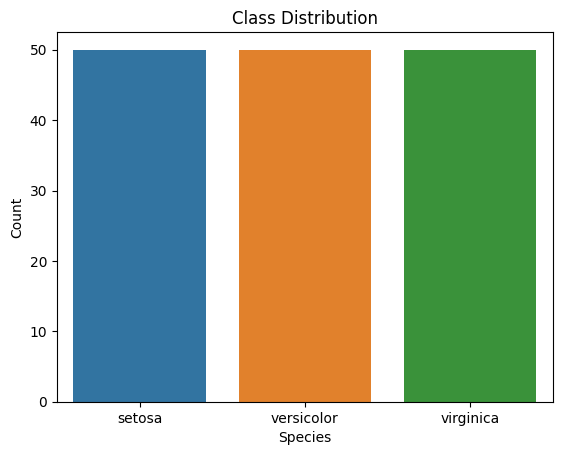

In [42]:

# Create a countplot of species distribution
sns.countplot(x='target', data=iris_df)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1, 2], iris.target_names)  
plt.show()


# logistic reggression

In [54]:
x = iris_df.drop(columns='target')
y=iris_df['target']


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1, stratify=y)


In [59]:
print(x_train.shape,x_test.shape)


(105, 4) (45, 4)


In [61]:
lr=LogisticRegression(random_state=1)

In [62]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [63]:
#prediction
predictions=lr.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))


0.9777777777777777


In [66]:
print("predictions is :{}", format(targets[predictions]))

predictions is :{} ['virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa']


In [67]:
y_test.head()

148    2
5      0
6      0
106    2
75     1
Name: target, dtype: int32

In [71]:
f = x_test.copy()
f['observed flower name'] = [targets[label] for label in y_test]
f['predicted flower name'] = [targets[label] for label in predictions]
f.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),observed flower name,predicted flower name
148,6.2,3.4,5.4,2.3,virginica,virginica
5,5.4,3.9,1.7,0.4,setosa,setosa
6,4.6,3.4,1.4,0.3,setosa,setosa
106,4.9,2.5,4.5,1.7,virginica,versicolor
75,6.6,3.0,4.4,1.4,versicolor,versicolor
